# Exercise: The Price of Weed

#### Summary

Find out how marijuana prices change over time and place in the United States

#### Data Source(s)

Data scraped from http://www.priceofweed.com/, GitHub repository at, https://github.com/frankbi/price-of-weed

Marijuana laws by state from https://data.world/sya/marijuana-laws-by-state

#### Files

- Lots of csvs in data/, formatted at DDMMYYY.csv, daily prices for different states
- `state_marijuana_laws_10_2016.csv`, marijuana laws by state

#### Data dictionary

- **State** the state name
- **HighQ** high quality marijuana, price per ounce
- **HighQN** high quality marijuana, sample size 
- **MedQ** medium quality marijuana, price per ounce
- **MedQN** medium quality marijuana, sample size
- **LowQ** low quality marijuana, price per ounce
- **LowQN** low quality marijuana, sample size

#### Skills

- Reading in many many files
- Combining multiple dataframes
- Cleaning up columns
- Customizing matplotlib graphs

# Read in `data/weedprices01012015.csv`

In [214]:
%matplotlib inline
import pandas as pd

In [215]:
df = pd.read_csv("data/weedprices01012015.csv")

In [216]:
df.head()

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN
0,Alabama,337.54,1539,208.24,1463,I feel bad for these guys -->,182
1,Alaska,303.02,350,270.45,475,I feel bad for these guys -->,37
2,Arizona,298.51,2638,209.43,2426,I feel bad for these guys -->,306
3,Arkansas,341.68,846,207.20,836,I feel bad for these guys -->,145
4,California,243.96,16512,189.35,19151,I feel bad for these guys -->,1096


## Cleaning things up

I have no idea what the whole "I feel bad for these guys" means, but *it certainly isn't good data*. It should probably be NaN instead: I'll let you decide how you're going to fix that one.

In [217]:
import numpy as np
np.nan

nan

In [218]:
df.LowQ.replace("I feel bad for these guys -->", np.nan, inplace=True)
df.head()

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN
0,Alabama,337.54,1539,208.24,1463,NaN,182
1,Alaska,303.02,350,270.45,475,NaN,37
2,Arizona,298.51,2638,209.43,2426,NaN,306
3,Arkansas,341.68,846,207.20,836,NaN,145
4,California,243.96,16512,189.35,19151,NaN,1096


## Graph the top 10 least expensive states for high quality marijuana

In [219]:
df_bottom_two = df.sort_values(by='HighQ').head()
df_bottom_two

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN
31,Oregon,205.80,2179,180.90,2018,NaN,95
47,Washington,233.01,3341,189.92,3564,NaN,160
5,Colorado,243.72,3148,195.11,2877,NaN,178
4,California,243.96,16512,189.35,19151,NaN,1096
20,Montana,265.51,738,241.42,364,NaN,32


In [220]:
df_top_two = df.sort_values(by='HighQ', ascending=False).head()
df_top_two

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN
28,North Dakota,393.94,213,339.60,327,NaN,23
45,Vermont,371.23,357,308.86,367,NaN,32
32,Maryland,366.01,2863,255.84,2463,NaN,193
46,Virginia,364.95,3514,293.02,3085,NaN,285
15,Iowa,364.92,975,289.05,1045,NaN,122


## Graph the top 5 least expensive and the top 5 most expensive states for high quality marijuana, in one graph

You'll probably need to make a new dataframe out of the first 5 and last 5.

In [221]:
df_new = pd.concat([df_bottom_two, df_top_two], ignore_index=True)
df_new

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN
0,Oregon,205.80,2179,180.90,2018,NaN,95
1,Washington,233.01,3341,189.92,3564,NaN,160
2,Colorado,243.72,3148,195.11,2877,NaN,178
3,California,243.96,16512,189.35,19151,NaN,1096
4,Montana,265.51,738,241.42,364,NaN,32
5,North Dakota,393.94,213,339.60,327,NaN,23
6,Vermont,371.23,357,308.86,367,NaN,32
7,Maryland,366.01,2863,255.84,2463,NaN,193
8,Virginia,364.95,3514,293.02,3085,NaN,285
9,Iowa,364.92,975,289.05,1045,NaN,122


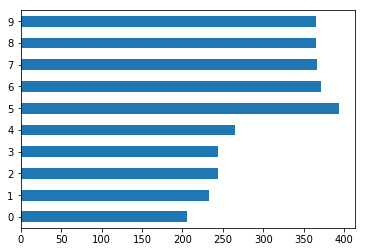

In [222]:
df_new.HighQ.plot(kind='barh')

## Now go back and make one of those graphs look nice!

- Add a title
- Add a label to the bottom axis
- Remove the label on the left axis
- Remove the legend
- Get rid of the boxes around everything
- Remove most of the tick marks
- Add dollar signs for the bottom

For tips, just ask me and/or use

- https://matplotlib.org/gallery.html
- Especially https://matplotlib.org/examples/ticks_and_spines/spines_demo.html

To format numbers, you can use something that might look a little familiar

```python
import matplotlib.ticker as ticker
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("${x:,.0f}"))
```

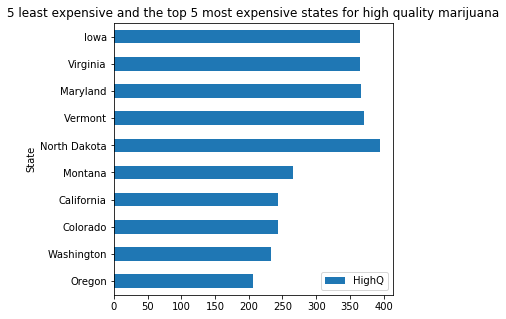

In [223]:
df_new.plot(x='State', y='HighQ', kind='barh', figsize=(5,5), title='5 least expensive and the top 5 most expensive states for high quality marijuana',)

In [224]:
import matplotlib.ticker as ticker

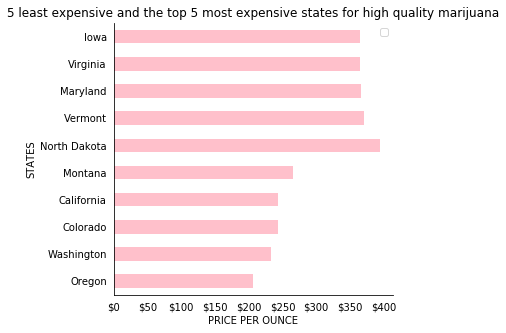

In [225]:

ax = df_new.plot(x='State', y='HighQ', kind='barh', title='5 least expensive and the top 5 most expensive states for high quality marijuana', figsize=(5,5), color='pink')
ax.set_xlabel('PRICE PER OUNCE')
ax.set_ylabel('STATES')
ax.xaxis.set_label('another way')
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("${x:,.0f}"))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
ax.legend('')

In [226]:
# df.loc[df.HighQ > 300, "feelings"] = "expensive"
# give me everywhere where HighQ > 300 and we're going to update a column named "diff"
# df.loc[df.HighQ > 300, "diff"] = df.HighQ - df.MedQ
# df['diff'] = df.HighQ - df.MedQ
# .fillna() 
# new_df = df[df.feelings.notnull()]
#dropna
#iinplace=True if I wanted to permanetly delete them
# new_df = df.dropna(subset=['feelings'])

# Reading in many many files

## Finding the filenames

Make a list of the filenames of every single CSV files inside of the `data` directory. Don't type them out.

If you do this correctly you will have a list of **491** filenames.

In [227]:
import glob

In [228]:
# * just fill everything in there (it's not a regex thing)
# glob to make a list of dataframes
# use list comprehension to read all of them

filenames = glob.glob("data/*.csv")
len(filenames)

491

## Turn them into dataframes

Read each of them in, converting them to a **list of dataframes**. Save as `price_dfs`.

- Tip: List comprehensions would be good here

In [229]:
price_dfs = [pd.read_csv(filename) for filename in filenames]
len(price_dfs)

491

In [230]:
price_dfs[0].head()

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN
0,Alabama,$339.06,1042,$198.64,933,$149.49,123
1,Alaska,$288.75,252,$260.6,297,$388.58,26
2,Arizona,$303.31,1941,$209.35,1625,$189.45,222
3,Arkansas,$361.85,576,$185.62,544,$125.87,112
4,California,$248.78,12096,$193.56,12812,$192.92,778


In [231]:
filenames[2]

'data/weedprices01022014.csv'

In [232]:
for filename, dataframe in zip(filenames, price_dfs):
    print("Looking at", filename)

Looking at data/weedprices01012014.csv
Looking at data/weedprices01012015.csv
Looking at data/weedprices01022014.csv
Looking at data/weedprices01022015.csv
Looking at data/weedprices01032014.csv
Looking at data/weedprices01042014.csv
Looking at data/weedprices01052014.csv
Looking at data/weedprices01062014.csv
Looking at data/weedprices01062015.csv
Looking at data/weedprices01072014.csv
Looking at data/weedprices01072015.csv
Looking at data/weedprices01082014.csv
Looking at data/weedprices01092014.csv
Looking at data/weedprices01102014.csv
Looking at data/weedprices01112014.csv
Looking at data/weedprices01122014.csv
Looking at data/weedprices02012014.csv
Looking at data/weedprices02012015.csv
Looking at data/weedprices02022014.csv
Looking at data/weedprices02022015.csv
Looking at data/weedprices02032014.csv
Looking at data/weedprices02042014.csv
Looking at data/weedprices02052014.csv
Looking at data/weedprices02062014.csv
Looking at data/weedprices02062015.csv
Looking at data/weedprice

## Examing the results

Look at the first 2 rows of the first dataframe.

Look at the first 2 rows of the last dataframe.

**If we combined them, could we tell them apart?**

In [233]:
price_dfs[0].head(2)

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN
0,Alabama,$339.06,1042,$198.64,933,$149.49,123
1,Alaska,$288.75,252,$260.6,297,$388.58,26


In [234]:
price_dfs[-1].head(2)

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN
0,Alabama,337.54,1539,208.15,1460,I feel bad for these guys -->,182
1,Alaska,303.02,350,270.45,475,I feel bad for these guys -->,37


## Making them identifiable

Each dataframe needs to have a column thats says the date. Or, actually... let's just save the filename as a column.

You **could** do it like this.

```python
# Take the first dataframe, which was made from the first filename
# Create a new 'filename' column using the first filename
price_dfs[0]['filename'] = filenames[0]
# Take the second dataframe, which was made from the second filename
# Create a new 'filename' column using the second filename
price_dfs[1]['filename'] = filenames[1]
# Take the third dataframe, which was made from the third filename
# Create a new 'filename' column using the third filename
price_dfs[2]['filename'] = filenames[2]
```

But that way is **not any fun**, and would take too long. I have a faster way.

In [235]:
# price_dfs[0]['filename']=filenames[0]
# price_dfs[1]['filename']=filenames[0]
# price_dfs[2]['filename']=filenames[0]
            # # but we don't want to do that hundrends of times
# numbers = [100,200,500]
# names=['Billy', 'Benny', 'Bobby']
            # #zip allows you to loop through TWO THINGS AT ONCE
# for number, name in zip(numbers, names):
#     print(number, name)
# for one in price_dfs:
#     one['filename'] = filename

In [236]:
for filename, dataframe in zip(filenames, price_dfs):
    dataframe['filename'] = filename

In [237]:
price_dfs[2].head(2)

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN,filename
0,Alabama,$338.8,1095,$200.02,984,$152.02,129,data/weedprices01022014.csv
1,Alaska,$288.81,265,$254.5,313,$388.58,26,data/weedprices01022014.csv


## Combine all 491 dataframes into one dataframe

Confirm it has **24990 rows and 8 columns.**

In [238]:
price_dfs_all = pd.concat(price_dfs, ignore_index=True)
price_dfs_all

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN,filename
0,Alabama,$339.06,1042,$198.64,933,$149.49,123,data/weedprices01012014.csv
1,Alaska,$288.75,252,$260.6,297,$388.58,26,data/weedprices01012014.csv
2,Arizona,$303.31,1941,$209.35,1625,$189.45,222,data/weedprices01012014.csv
3,Arkansas,$361.85,576,$185.62,544,$125.87,112,data/weedprices01012014.csv
4,California,$248.78,12096,$193.56,12812,$192.92,778,data/weedprices01012014.csv
5,Colorado,$236.31,2161,$195.29,1728,$213.5,128,data/weedprices01012014.csv
6,Connecticut,$347.9,1294,$273.97,1316,$257.36,91,data/weedprices01012014.csv
7,Delaware,$373.18,347,$226.25,273,$199.88,34,data/weedprices01012014.csv
8,District of Columbia,$352.26,433,$295.67,349,$213.72,39,data/weedprices01012014.csv
9,Florida,$306.43,6506,$220.03,5237,$158.26,514,data/weedprices01012014.csv


In [239]:
price_dfs_all.LowQ.replace("I feel bad for these guys -->", np.nan, inplace=True)
price_dfs_all

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN,filename
0,Alabama,$339.06,1042,$198.64,933,$149.49,123,data/weedprices01012014.csv
1,Alaska,$288.75,252,$260.6,297,$388.58,26,data/weedprices01012014.csv
2,Arizona,$303.31,1941,$209.35,1625,$189.45,222,data/weedprices01012014.csv
3,Arkansas,$361.85,576,$185.62,544,$125.87,112,data/weedprices01012014.csv
4,California,$248.78,12096,$193.56,12812,$192.92,778,data/weedprices01012014.csv
5,Colorado,$236.31,2161,$195.29,1728,$213.5,128,data/weedprices01012014.csv
6,Connecticut,$347.9,1294,$273.97,1316,$257.36,91,data/weedprices01012014.csv
7,Delaware,$373.18,347,$226.25,273,$199.88,34,data/weedprices01012014.csv
8,District of Columbia,$352.26,433,$295.67,349,$213.72,39,data/weedprices01012014.csv
9,Florida,$306.43,6506,$220.03,5237,$158.26,514,data/weedprices01012014.csv


## Pull out the day, month and year from each filename

Do **not** store it back yet!

In [240]:
df_year = price_dfs_all['filename'].str.extract(r'(\d\d)(\d\d)(\d\d\d\d)')
df_year.columns = ['DAY','MONTH','YEAR']
df_year

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


,DAY,MONTH,YEAR
0,01,01,2014
1,01,01,2014
2,01,01,2014
3,01,01,2014
4,01,01,2014
5,01,01,2014
6,01,01,2014
7,01,01,2014
8,01,01,2014
9,01,01,2014


## Okay, now add all three columns back at once

You should rename the columns first!

In [241]:
df_sep_date = price_dfs_all.merge(df_year, left_index=True, right_index=True)
df_sep_date.head()


,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN,filename,DAY,MONTH,YEAR
0,Alabama,$339.06,1042,$198.64,933,$149.49,123,data/weedprices01012014.csv,01,01,2014
1,Alaska,$288.75,252,$260.6,297,$388.58,26,data/weedprices01012014.csv,01,01,2014
2,Arizona,$303.31,1941,$209.35,1625,$189.45,222,data/weedprices01012014.csv,01,01,2014
3,Arkansas,$361.85,576,$185.62,544,$125.87,112,data/weedprices01012014.csv,01,01,2014
4,California,$248.78,12096,$193.56,12812,$192.92,778,data/weedprices01012014.csv,01,01,2014


In [242]:
df_sep_date['time'] = pd.to_datetime(df_sep_date['DAY']+"/"+df_sep_date['MONTH']+"/"+ df_sep_date['YEAR'], format = "%d/%m/%Y")

In [243]:
df_sep_date.head()

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN,filename,DAY,MONTH,YEAR,time
0,Alabama,$339.06,1042,$198.64,933,$149.49,123,data/weedprices01012014.csv,01,01,2014,2014-01-01
1,Alaska,$288.75,252,$260.6,297,$388.58,26,data/weedprices01012014.csv,01,01,2014,2014-01-01
2,Arizona,$303.31,1941,$209.35,1625,$189.45,222,data/weedprices01012014.csv,01,01,2014,2014-01-01
3,Arkansas,$361.85,576,$185.62,544,$125.87,112,data/weedprices01012014.csv,01,01,2014,2014-01-01
4,California,$248.78,12096,$193.56,12812,$192.92,778,data/weedprices01012014.csv,01,01,2014,2014-01-01


In [244]:
# extracted = df.sentence.str.extract("My names is (.*) and I love (.*)")
# df.merge(extracte, right_index= True, left_index=False)
#OR
# extracted.head()
# df.head()
# pd.concat([df, extracted], axis=1)

## Plot the change in marijuana prices in Oregon over time

In [245]:
Oregon_df = df_sep_date[df_sep_date['State'] =='Oregon']
Oregon_df.head()

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN,filename,DAY,MONTH,YEAR,time
31,Oregon,$213.49,1612,$188.55,1336,$175.87,61,data/weedprices01012014.csv,01,01,2014,2014-01-01
82,Oregon,205.8,2179,180.9,2018,NaN,95,data/weedprices01012015.csv,01,01,2015,2015-01-01
133,Oregon,$212.44,1677,$188.96,1384,$174.52,65,data/weedprices01022014.csv,01,02,2014,2014-02-01
184,Oregon,205.32,2232,180.47,2091,NaN,99,data/weedprices01022015.csv,01,02,2015,2015-02-01
235,Oregon,$212.01,1731,$188.5,1450,$169.34,68,data/weedprices01032014.csv,01,03,2014,2014-03-01


In [246]:
Oregon_df.dtypes

State               object
HighQ               object
HighQN              object
MedQ                object
MedQN               object
LowQ                object
LowQN               object
filename            object
DAY                 object
MONTH               object
YEAR                object
time        datetime64[ns]
dtype: object

In [247]:
Oregon_df['HighQ'] = Oregon_df['HighQ'].str.replace("$","")

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [248]:
Oregon_df['HighQ'] = Oregon_df['HighQ'].fillna(0)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [249]:
Oregon_df['HighQ'] = Oregon_df['HighQ'].astype(float)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [250]:
Oregon_df['HighQ'].replace(0,np.nan, inplace=True)

/usr/local/lib/python3.6/site-packages/pandas/core/generic.py:3924: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [251]:
Oregon_df

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN,filename,DAY,MONTH,YEAR,time
31,Oregon,213.49,1612,$188.55,1336,$175.87,61,data/weedprices01012014.csv,01,01,2014,2014-01-01
82,Oregon,NaN,2179,180.9,2018,NaN,95,data/weedprices01012015.csv,01,01,2015,2015-01-01
133,Oregon,212.44,1677,$188.96,1384,$174.52,65,data/weedprices01022014.csv,01,02,2014,2014-02-01
184,Oregon,NaN,2232,180.47,2091,NaN,99,data/weedprices01022015.csv,01,02,2015,2015-02-01
235,Oregon,212.01,1731,$188.5,1450,$169.34,68,data/weedprices01032014.csv,01,03,2014,2014-03-01
286,Oregon,210.81,1783,$186.31,1507,$165.54,72,data/weedprices01042014.csv,01,04,2014,2014-04-01
337,Oregon,210.12,1816,$185.73,1551,$165.81,76,data/weedprices01052014.csv,01,05,2014,2014-05-01
388,Oregon,209.54,1858,$185.17,1606,$163.84,77,data/weedprices01062014.csv,01,06,2014,2014-06-01
439,Oregon,NaN,2531,178.16,2402,NaN,113,data/weedprices01062015.csv,01,06,2015,2015-06-01
490,Oregon,208.85,1900,$184.86,1641,$175.53,80,data/weedprices01072014.csv,01,07,2014,2014-07-01


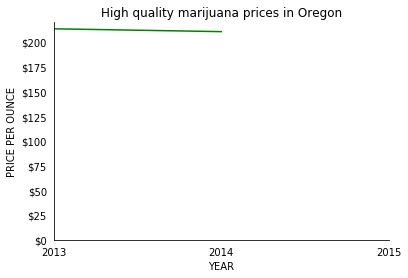

In [252]:
ax = Oregon_df.groupby('YEAR')['HighQ'].mean().plot(y='YEAR', color='green', ylim=(0,220))
ax.set_xlabel('YEAR')
ax.set_ylabel('PRICE PER OUNCE')
ax.xaxis.set_label('Price')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("${x:,.0f}"))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
ax.set_title('High quality marijuana prices in Oregon')

## Plot the change in marijuana prices in all states over time

In [286]:
df_sep_date['HighQ'] = df_sep_date['HighQ'].str.replace("$","")

In [287]:
df_sep_date['HighQ'].fillna(0, inplace=True)

In [289]:
df_sep_date['HighQ'].astype(float, inplace=True)

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
5        0.0
6        0.0
7        0.0
8        0.0
9        0.0
10       0.0
11       0.0
12       0.0
13       0.0
14       0.0
15       0.0
16       0.0
17       0.0
18       0.0
19       0.0
20       0.0
21       0.0
22       0.0
23       0.0
24       0.0
25       0.0
26       0.0
27       0.0
28       0.0
29       0.0
        ... 
24960    0.0
24961    0.0
24962    0.0
24963    0.0
24964    0.0
24965    0.0
24966    0.0
24967    0.0
24968    0.0
24969    0.0
24970    0.0
24971    0.0
24972    0.0
24973    0.0
24974    0.0
24975    0.0
24976    0.0
24977    0.0
24978    0.0
24979    0.0
24980    0.0
24981    0.0
24982    0.0
24983    0.0
24984    0.0
24985    0.0
24986    0.0
24987    0.0
24988    0.0
24989    0.0
Name: HighQ, Length: 24990, dtype: float64

In [290]:
df_sep_date['HighQ'].replace(0,np.nan, inplace=True)

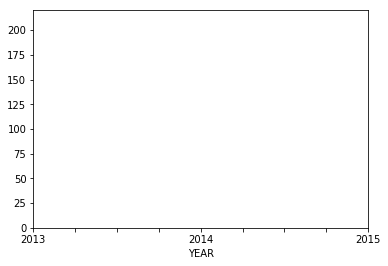

In [297]:
df_sep_date.groupby('YEAR')['HighQ'].mean().plot(x= 'YEAR', y='HighQ', color='green', ylim=(0,220))
